In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [27]:
df = pd.read_csv("epa-sea-level.csv")

In [28]:
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
139,2019,NaN,NaN,NaN,9.594329
140,2020,NaN,NaN,NaN,9.699874
141,2021,NaN,NaN,NaN,9.886688
142,2022,NaN,NaN,NaN,9.974711


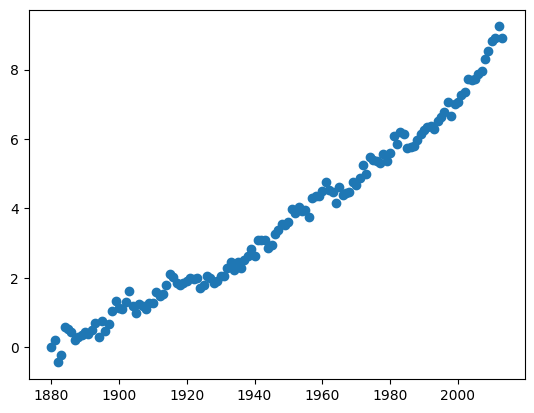

In [29]:
fig, ax = plt.subplots()
ax.scatter(df["Year"],df["CSIRO Adjusted Sea Level"])
plt.show()

In [30]:
line1 = linregress(df["Year"],df["CSIRO Adjusted Sea Level"])

In [31]:
print(df.isnull().sum())

Year                          0
CSIRO Adjusted Sea Level     10
Lower Error Bound            10
Upper Error Bound            10
NOAA Adjusted Sea Level     113
dtype: int64


In [38]:
# Run regression only on clean data
slope, intercept, r_value, p_value, std_err = linregress(df_clean["Year"], df_clean["CSIRO Adjusted Sea Level"])

# Predict sea level in 2050
predicted_2050 = intercept + slope * 2050
print(predicted_2050)

10.154125431395713


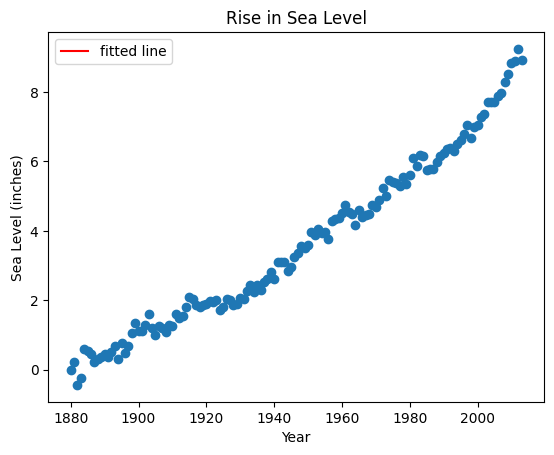

In [39]:
fig, ax = plt.subplots()
ax.scatter(df["Year"], df["CSIRO Adjusted Sea Level"])
plt.plot(df["Year"], line1.intercept + line1.slope*df["Year"], 'r', label='fitted line')
ax.set_xlabel("Year")
ax.set_ylabel("Sea Level (inches)")
ax.set_title("Rise in Sea Level")
plt.legend()
plt.show()

In [45]:
# Filter data for Year > 2000
df_2000 = df[df["Year"] > 2000]

# Drop any rows with NaN values (to avoid nan in linregress)
df_2000 = df_2000.dropna(subset=["Year", "CSIRO Adjusted Sea Level"])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(
    df_2000["Year"], df_2000["CSIRO Adjusted Sea Level"]
)

# Predict sea level in 2050
predicted_2050 = intercept + slope * 2050
print(predicted_2050)

15.11179370257696


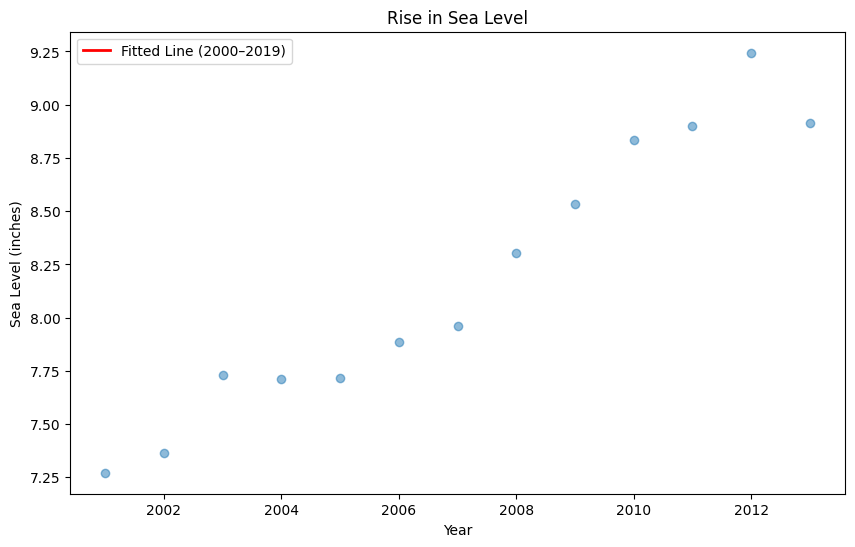

In [49]:
x = df_2000["Year"]
y = line2.intercept + line2.slope * x

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x, df_2000["CSIRO Adjusted Sea Level"], alpha=0.5)
ax.plot(x, y, 'r', linewidth=2, label="Fitted Line (2000–2019)")
ax.set_xlabel("Year")
ax.set_ylabel("Sea Level (inches)")
ax.set_title("Rise in Sea Level")
ax.legend()
plt.show()